In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts

data = pd.read_csv('ECDCCases.csv', sep=",")

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

print('\n')
data.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000','geoId'], axis = 1, inplace=True)
median_popData2019 = data.popData2019.median()
data.popData2019.fillna(median_popData2019, inplace=True)
data.countryterritoryCode.fillna('empty', inplace=True)

for column in data.columns:
  missing = np.mean(data[column].isna()*100)
  print(f" {column} : {round(missing,1)}%")

 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 geoId : 0.4%
 countryterritoryCode : 0.2%
 popData2019 : 0.2%
 continentExp : 0.0%
 Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 : 4.7%


 dateRep : 0.0%
 day : 0.0%
 month : 0.0%
 year : 0.0%
 cases : 0.0%
 deaths : 0.0%
 countriesAndTerritories : 0.0%
 countryterritoryCode : 0.0%
 popData2019 : 0.0%
 continentExp : 0.0%


                day         month          year          cases        deaths  \
count  61904.000000  61904.000000  61904.000000   61904.000000  61904.000000   
mean      15.629232      7.067104   2019.998918    1155.079026     26.053987   
std        8.841624      2.954816      0.032881    6779.010824    131.222948   
min        1.000000      1.000000   2019.000000   -8261.000000  -1918.000000   
25%        8.000000      5.000000   2020.000000       0.000000      0.000000   
50%       15.000000      7.000000   2020.000000      15.000000      0.000000   
75%       23.000000     10.000000   2020.000000     273.000000      4.000000   
max       31.000000     12.000000   2020.000000  234633.000000   4928.000000   

        popData2019  
count  6.190400e+04  
mean   4.091909e+07  
std    1.529798e+08  
min    8.150000e+02  
25%    1.324820e+06  
50%    7.169456e+06  
75%    2.851583e+07  
max    1.433784e+09  


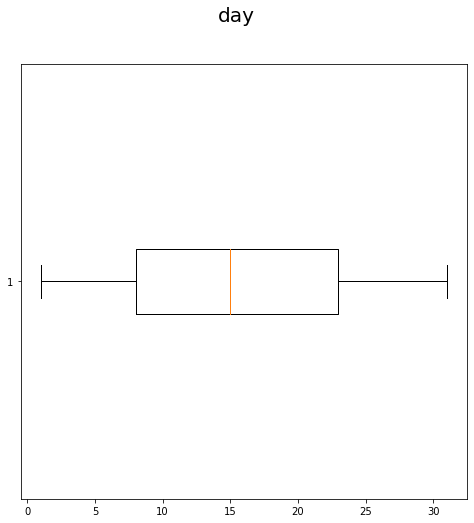

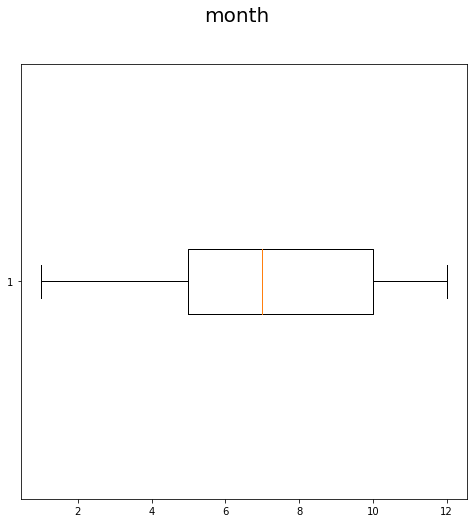

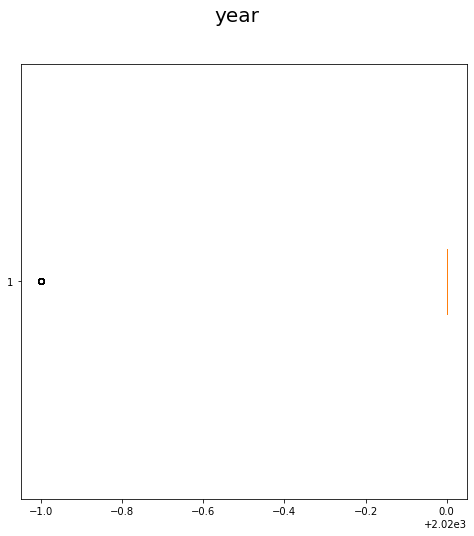

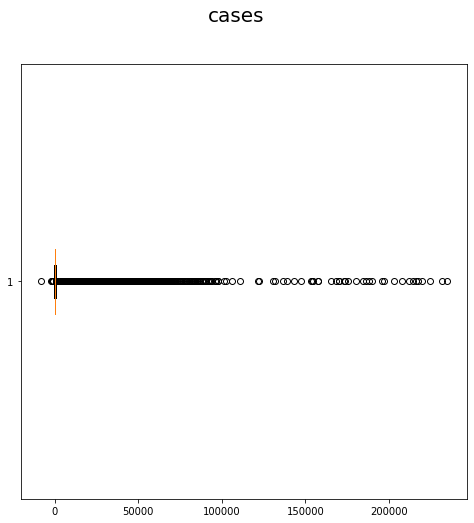

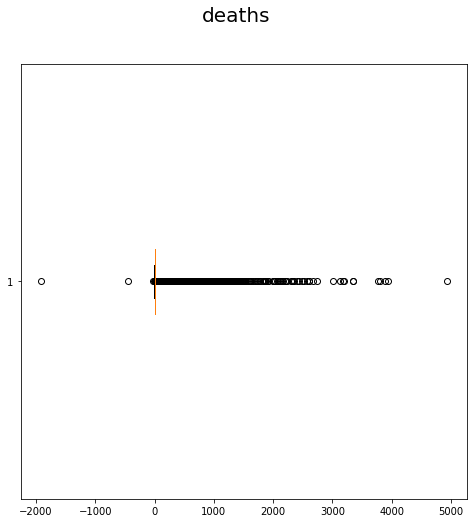

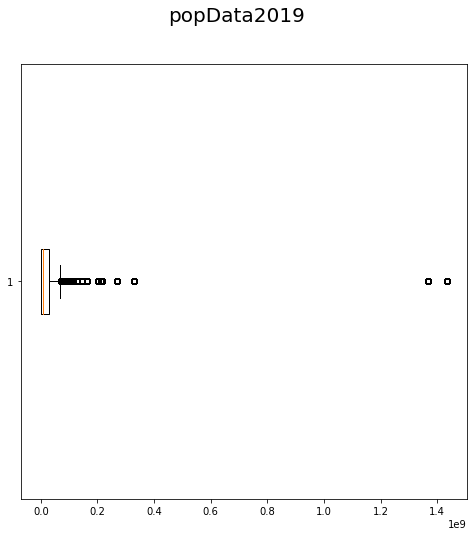

In [ ]:
print(data.describe())

for column in data.columns:
  if not(isinstance(data[column][0], str)):
    plt.figure(figsize = (8, 8))
    plt.suptitle(column, fontsize=20)
    plt.boxplot(data[column], vert = False)

plt.show()

In [ ]:
print(data.loc[data['deaths'] > 3000].value_counts().sum())
print(data.loc[data['deaths'] > 3000]['countriesAndTerritories'].unique())

11
['Argentina' 'Ecuador' 'Mexico' 'Peru' 'United_States_of_America']


In [ ]:
Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

data.drop_duplicates(keep = 'first', inplace = True)

Dup_Rows = data[data.duplicated()]
print("Повторяющиеся строки : \n {}".format(Dup_Rows))

Повторяющиеся строки : 
           dateRep  day  month  year  cases  deaths countriesAndTerritories  \
3      12/12/2020   12     12  2020    113      11             Afghanistan   
218    12/05/2020   12      5  2020    285       2             Afghanistan   
48010  29/05/2020   29      5  2020      0       0             Saint_Lucia   
48073  28/03/2020   28      3  2020      0       0             Saint_Lucia   

      countryterritoryCode  popData2019 continentExp  
3                      AFG   38041757.0         Asia  
218                    AFG   38041757.0         Asia  
48010                  LCA     182795.0      America  
48073                  LCA     182795.0      America  
Повторяющиеся строки : 
 Empty DataFrame
Columns: [dateRep, day, month, year, cases, deaths, countriesAndTerritories, countryterritoryCode, popData2019, continentExp]
Index: []


In [ ]:
dataBmi = pd.read_csv('bmi.csv')

print(sts.shapiro(dataBmi.loc[dataBmi['region'] == 'northwest'].bmi))
print(sts.shapiro(dataBmi.loc[dataBmi['region'] == 'southwest'].bmi))

print(sts.bartlett(dataBmi.loc[dataBmi['region'] == 'northwest'].bmi, dataBmi.loc[dataBmi['region'] == 'southwest'].bmi))

print(sts.ttest_ind(dataBmi.loc[dataBmi['region'] == 'northwest'].bmi, dataBmi.loc[dataBmi['region'] == 'southwest'].bmi))

ShapiroResult(statistic=0.9954643249511719, pvalue=0.46545225381851196)
ShapiroResult(statistic=0.994927167892456, pvalue=0.3630009591579437)
BartlettResult(statistic=3.4000745256459286, pvalue=0.06519347353581818)
Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


In [5]:
dataCube = pd.DataFrame({
    'N': [1, 2, 3, 4, 5, 6],
    'rolls': [97, 98, 109, 95, 97, 104],
    'exc': [100, 100, 100, 100, 100, 100]
})

sts.chisquare(dataCube['rolls'], dataCube['exc'])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

In [ ]:
data = pd.DataFrame({'Женат': [89,17,11,43,22,1],
 'Гражданский брак': [80,22,20,35,6,4],
 'Не состоит в отношениях': [35,44,35,6,8,22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает','На домохозяйстве','На пенсии','Учёба']

sts.chi2_contingency(data)[:3]

(122.29654948595365, 1.7291616900960234e-21, 10)